<a href="https://colab.research.google.com/github/ahberson/Berson_QNC_Fall2025/blob/main/Berson_090925_Confidence_Intervals_and_Bootstrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definition

A confidence interval quantifies a range of potential values that a parameter of a population (e.g., its mean value) can take, based on sampled observations (i.e., the data you have). In other words, the confidence interval is a measure of uncertainty: the wider the interval, the more uncertainty there is on the actual value of the parameter, given the data. Confidence intervals are a foundational piece of all rigorous, quantitative analyses of data and in fact have been proposed to be one of the three pillars of "[the new statistics](https://journals.sagepub.com/doi/full/10.1177/0956797613504966)" (the other two being measures of effect sizes and the use of meta-analyses).

Exactly how confidence intervals should be interpreted is a matter of [debate](https://stats.stackexchange.com/questions/2272/whats-the-difference-between-a-confidence-interval-and-a-credible-interval) and depends (of course!) on whether it was computed using frequentist or Bayesian methods. In either case, they are computed at a pre-specified confidence level, which is typically 95% but can be other values (e.g., 90% or 99%).

Using Bayesian methods, the interval (typically referred to as a "credible interval") is interpreted in a more intuitive manner: there is a 95% (or whatever value that is specified by the confidence level) chance that the true value is within the given interval (more specifically, 95% of the mass of the posterior probability distribution is within the given interval).

In contrast, a frequentist confidence interval implies that if we repeated the same experiment N times, the true value will fall within that interval 95% of the time.

The good news is that under a number of common conditions, the two approaches give very similar answers and so as a practical matter it might not matter very much which you use (e.g., [this paper](https://canvas.upenn.edu/courses/1358934/files/folder/Courses/Quantitative%20Neuro%20Core/Readings/Confidence%20Intervals%20and%20Bootstrapping/Confidence%20Intervals?preview=79166068)). The bad news is that there are conditions in which the two approaches do not give the same answers (see [here](https://pubmed.ncbi.nlm.nih.gov/26450628/) and [here](https://psyarxiv.com/we9h6)), which are worth being aware of as you compute confidence intervals.

# Four ways to compute a confidence (or credible) interval on an estimate of the mean of a population

Here we assume that we have *n* measurements ($x_i$) from a population that we know is [Gaussian distributed](https://github.com/PennNGG/Quantitative-Neuroscience/blob/master/Probability%20Distributions/Python/Gaussian%20(Normal).ipynb) (i.e., with a true mean $\mu$ and standard deviation $\sigma$). Thus the sample mean ($\bar{x}$) is computed as:

$\bar{x}=\frac{\Sigma{x_i}}{n}$.

We want to find a confidence interval on our estimate of the mean. This is a very common problem, and the different approaches described below will all give roughly the same answer.

## 1. The simple, analytic approach with large *n* and/or known standard deviation.

Here we compute the confidence interval in terms of multiples of the standard error of the mean, which is the standard deviation of the sampling distribution of the mean -- that is, the standard deviation of the distribution you would get if you repeated your experiment over and over and computed the sample mean each time.

This approach requires understanding several concepts:

a. Because of the [Central Limit Theorem](https://online.stat.psu.edu/stat414/book/export/html/750), the sampling distribution of the mean approaches a [normal (Gaussian)](https://github.com/PennNGG/Quantitative-Neuroscience/blob/master/Probability%20Distributions/Python/Gaussian%20(Normal).ipynb) distribution with large *n*; see [here](https://stats.stackexchange.com/questions/371067/trouble-relating-the-central-limit-theorem-to-confidence-intervals) and [here](https://online.stat.psu.edu/stat506/lesson/1/1.4) for discussions of how this idea relates to confidence intervals.

b. Accordingly, we assess the variability of the sampling distribution of the mean based on its (known) standard deviation. This value is known as the standard error of the mean (SEM), which can be computed from the true standard deviation (*s*) of the sampled distribution as:

$SEM=\frac{s}{\sqrt{n}}=\sqrt{\frac{\Sigma{(x-\bar{x})^2}}{n}}$

Careful: don't [confuse *s* and the SEM](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3148365/)!

c. The SEM thus indicates the range of values that are within one standard deviation of the mean value of the sampling distribution of the mean, which corresponds to ~68% of all possible values:

![](https://drive.google.com/uc?export=view&id=1hct1RNgwYziStIetfxlUNy12bx3qpXCS)

In other words, the notation $[\bar{x}-SEM, \bar{x}+SEM]$ indicates the lower and upper bounds of the 68% confidence interval on the mean.

d. The confidence interval for an arbitrary confidence level can be computed by simply multiplying the SEM by a factor that corresponds to the appropriate range of the sampling distribution of the mean. This factor is known as the [z-score](https://www.statisticshowto.com/probability-and-statistics/z-score/) and represents the number of standard deviations that a value is from the mean of a distribution. It can be determined using a [z-score calculator](http://www.z-table.com), which relates the z-score to the area under the curve that is to the left of that z-score (i.e., the total probability that the value is less than that z-score):

![](https://drive.google.com/uc?export=view&id=1MZVC7ez6N9w8MInWdzJl635q5L-IHf0z)

For a standard, two-sided confidence interval, the appropriate z-score is determined based on one-half of one minus the confidence level, because you want to find the area between two symmetric tails.

Let's say you want the 95% confidence interval (i.e., 0.95). Thus, you need to identify the z-score corresponding to an area equal to 0.5*(1–0.95) = 0.025, which is 1.96. Thus, the 95% confidence interval = $[\bar{x}-SEM\times 1.96, \bar{x}+SEM\times 1.96]$

You can get the z-score corresponding to a particular area under the curve to the left of that z-score in Matlab using [norminv](https://www.mathworks.com/help/stats/norminv.html) and in Python using the ppf method of Scipy's [norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).



## 2. The simple, analytic approach with small *n* and unknown population standard deviation

When the true population standard deviation is not known (as is typically the case), the SEM must be calculated using the sample standard deviation (i.e., the standard deviation estimated from the data). As detailed [here](https://colab.research.google.com/drive/1Q_Du5NK71Rc1qu-byh8dy8Fs39uvR_4n?usp=sharing), the sample standard deviation is biased unless you use [Bessel's correction](https://www.statisticshowto.com/bessels-correction/) to minimize the bias. Using this correction, the sample distribution of the mean value of a normally distributed random variable follows a [Student's t-distribution](https://colab.research.google.com/drive/1Q_Du5NK71Rc1qu-byh8dy8Fs39uvR_4n?usp=sharing) that deviates most strongly from a normal distribution when *n* is relatively small (it has heavier tails than a normal distribution, which implies that there are more extreme values). Here computing confidence intervals is the same as above, but instead of using a z-score calculator (which assumes a normal distribution), you need to use a [t-distribution calculator](https://www.dummies.com/education/math/statistics/using-the-t-distribution-to-calculate-confidence-intervals/).

## 3. Bootstrapped confidence intervals

[Bootstrapping](https://projecteuclid.org/journals/annals-of-statistics/volume-7/issue-1/Bootstrap-Methods-Another-Look-at-the-Jackknife/10.1214/aos/1176344552.full) [available on [Canvas](https://canvas.upenn.edu/courses/1358934/files/folder/Courses/Quantitative%20Neuro%20Core/Readings/Confidence%20Intervals%20and%20Bootstrapping/Bootstrapping?preview=98867712)] is a powerful approach for estimating a sample distribution given a set of observed data. The idea is to resample (with replacement) from those data, each time computing the statistic of interest (e.g., the mean). You can then use this distribution directly to determine the confidence intervals.

Advantages of this approach are that it: 1) does not require assumptions about the nature of the population distribution; 2) can be applied equally well to multiple statistics (e.g., mean or median); and 3) is easy to compute.

Bootstrapping is based on the following logic (taken from this [nice description](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading24.pdf)):

1. $x_1, x_2,...,x_n$ is a data sample drawn from a distribution $F$.
2. $\mu$ is a statistic computed from the sample.
3. $F^∗$ is the empirical distribution of the data (the resampling distribution).
4. $x_1^*, x_2^*,...,x_n^*$
 is a resample of the data *of the same size as the original sample*.
5. $\mu^*$ is the statistic computed from the resample.

The idea is that you now have a distribution $F^*$ that can be used as a surrogate for $F$; that is, confidence intervals on $\mu$ are computed as confidence intervals on $\mu^*$.



## 4. Bayesian credible intervals

Credible intervals are a measure of our belief in a parameter of the population, given our data. We therefore compute the posterior probability distribution of the population mean $\mu$ given data samples $X={x_1, x_2,...,x_n}$ according to Bayes' Rule:

$p(\mu|X)=\frac{p(X|\mu)p(\mu)}{p(X)}$

Here $p(X)$ represents the probability of getting the data and is really just a normalizing constant (to make sure the area under the resulting probability distribution equals one), so we'll call it *k*. $p(\mu)$ is the prior on the mean; that is, what is the probability that the mean is equal to each particular value, determined before you see any data? We will assume this probability is uniform and thus will also refer to it as a constant, say *p*. That leaves just the likelihood term $p(X|\mu)$, which based on our assumptions above is a Gaussian (here let us assume that we know the standard deviation $\sigma$). Note that *X* is a set of *n* independent observations, so the total likelihood is the product of the likelihoods determined for each observation separately; that is:

$p(X|\mu)=\prod^n_{i-1}{\frac{1}{\sqrt{2\pi \sigma^2}}exp\left [ \frac{-(x_i-\mu)^2}{2\sigma^2} \right ]}$

Which we can rearrange and multiply by $p(\mu)=p$ and divide by $p(X)=k$ to get the posterior:

$p(\mu|X)=\frac{p}{k\sqrt{2\pi \sigma^2}}exp{\left [\frac{1}{2\sigma^2} \sum^n_{i-1}(x_i-\mu)^2 \right ]}$

Then using the definition of the sample mean ($\bar{x}=\frac{1}{n}\sum{x_i}$), [this shortcut for computing the variance](https://www.thoughtco.com/sum-of-squares-formula-shortcut-3126266), and rearranging some more gives:

$p(\mu|X)=\frac{p}{k\sqrt{2\pi \sigma^2}}exp{\left [\frac{1}{2\sigma^2} \left [ n^2\sigma^2+n\bar{x^2}-2n\mu\bar{x}^2 +n\mu^2\right ] \right ]}$

$p(\mu|X)=\frac{p}{k\sqrt{2\pi \sigma^2}}exp{\left [ -\frac{n^2\sigma^2}{s\sigma^2} -\frac{n}{2\sigma^2}(\mu-\bar{x})^2\right ]}$

Note that we rearranged terms to make it clear that we are considering different values of $\mu$ as they relate to the given sample mean $\bar{x}$. Let's rearrange one more time:

$p(\mu|X)=\frac{p}{k\sqrt{2\pi \sigma^2}}exp{\left [ -\frac{n^2\sigma^2}{s\sigma^2}\right ]}exp{\left[ -\frac{1}{2\frac{\sigma^2}{n}}(\mu-\bar{x})^2\right ]}$

This form shows that the posterior distribution for given X is itself a Gaussian with a mean value of $\bar{x}$ and a standard deviation of $\frac{\sigma}{\sqrt{n}}$; in other words, a distribution defined by the sample mean and the standard error of the mean! In this case, the credible interval is computed in exactly the same way as the confidence interval computed analytically from the sample mean and standard error of the mean described above.

# Exercises

Compute confidence/credible intervals based on the four methods above for simulated data sampled from a population that is Gaussian distributed with mean $\mu$=10 and standard deviation $\sigma$=2, for *n*=5, 10, 20, 40, 80, 160, 1000 at a 95% confidence level.

The answers will be found [here](https://github.com/PennNGG/Quantitative-Neuroscience/tree/master/Answers%20to%20Exercises/Python) after the due date.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t


Method 1
[[9.46, 11.74], [9.83, 12.24], [8.51, 10.18], [9.12, 10.23], [9.68, 10.55], [9.57, 10.18], [9.82, 10.06]]
Method 2
[[8.79, 12.4], [9.57, 12.5], [8.43, 10.26], [9.09, 10.26], [9.67, 10.56], [9.56, 10.18], [9.82, 10.06]]
Method 3
[[9.45, 11.62], [9.7, 12.13], [8.53, 10.21], [9.12, 10.19], [9.66, 10.55], [9.55, 10.16], [9.82, 10.06]]
Method 4
[[8.85, 12.35], [9.8, 12.28], [8.47, 10.22], [9.05, 10.29], [9.68, 10.56], [9.56, 10.18], [9.82, 10.06]]


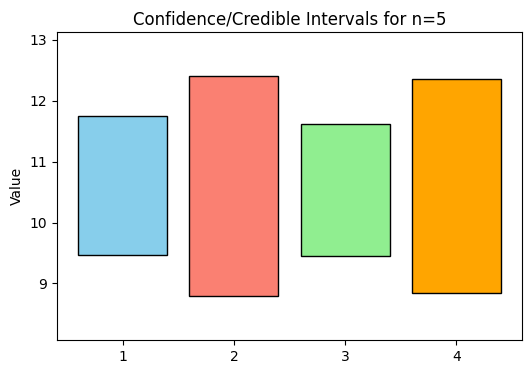

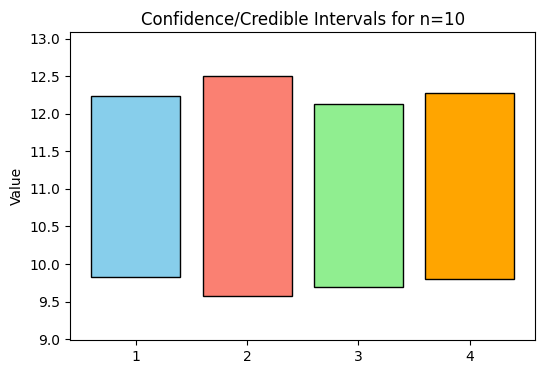

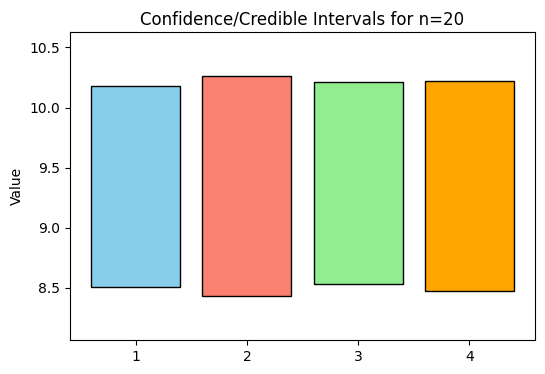

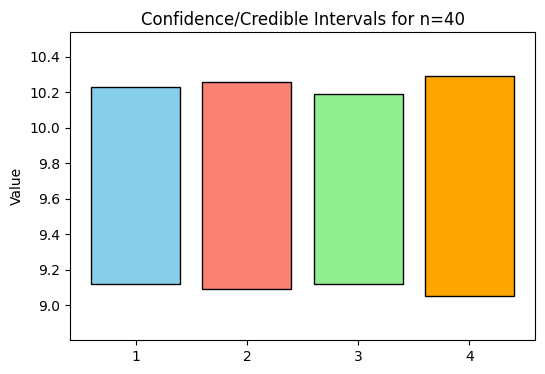

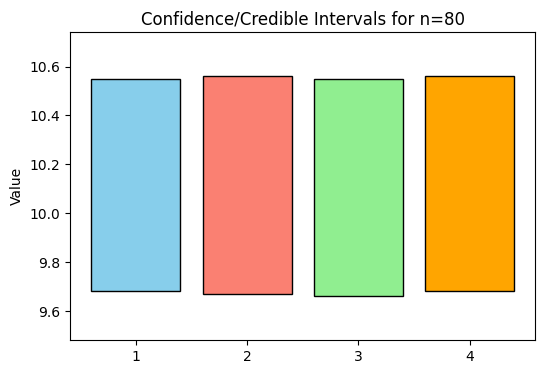

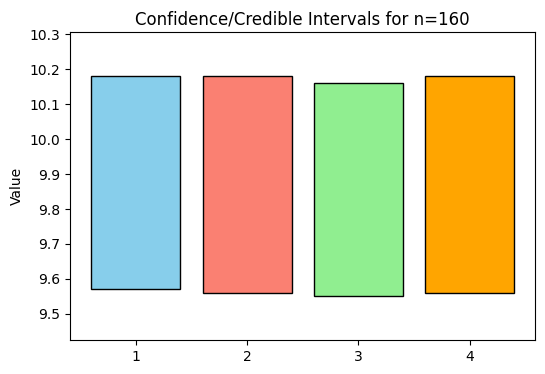

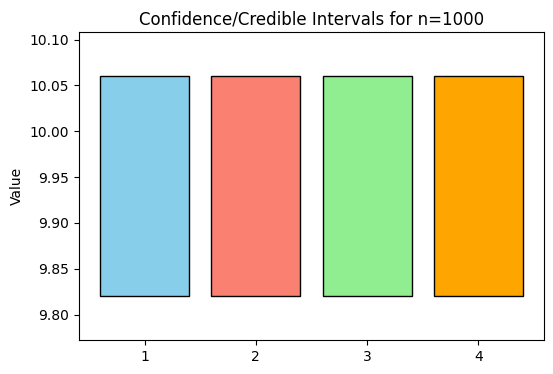

In [16]:
mu = 10
sigma = 2
ns = [5,10,20,40,80,160,1000]
ci = 0.95

sim_data = []
for n in ns:
  sim_data.append(np.random.normal(loc=mu, scale=sigma, size=n))

results = []

# Method 1: Using SEM and z-distribution
m1 = []
for data in sim_data:
  xbar = np.mean(data)
  s = np.std(data)
  sem = s/np.sqrt(len(data))

  z_val = 1.96 #told in intro

  lower = round(float(xbar - sem*z_val),2)
  upper = round(float(xbar + sem*z_val),2)

  m1.append([lower,upper])

results.append(m1)

# Method 2: Using SEM and t-distribution
m2 = []
for data in sim_data:
  xbar = np.mean(data)
  s = np.std(data, ddof = 1) #Bessel's Correction just minuses 1 (ddof = 1) from n when doing the s calculation
  sem = s/np.sqrt(len(data))

  t_cutoff = 1-((1-ci)/2)
  t_val = t.ppf(t_cutoff, df = len(data)-1) #df is determined by the n and we adjust z95 cutoff to encompass the lower distribution for finding the t-value

  lower = round(float(xbar - sem*t_val),2)
  upper = round(float(xbar + sem*t_val),2)

  m2.append([lower,upper])

results.append(m2)

# Method 3: Bootstrapping
m3 = []
n_boot = 1000  # number of bootstrap resamples

for data in sim_data:

    boot_means = []

    # generate bootstrap samples
    for _ in range(n_boot): #run loop n_boot times
        resample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(resample))

    # compute 2.5th and 97.5th percentiles
    low_cutoff = ((1-ci)/2) * 100
    high_cutoff = (1-(1-ci)/2) * 100
    lower, upper = np.percentile(boot_means, [low_cutoff, high_cutoff])
    lower, upper = round(float(lower), 2), round(float(upper), 2)

    m3.append([lower, upper])

results.append(m3)

# Method 4: Bayesian Credible Intervals
m4 = []
for data in sim_data:
    xbar = np.mean(data)

    sem = sigma / np.sqrt(len(data))  # use *true* sigma

    z_val = 1.96  # 95% credible interval

    lower = round(float(xbar - sem * z_val), 2)
    upper = round(float(xbar + sem * z_val), 2)

    m4.append([lower, upper])

results.append(m4)

# Display Results
for method, data in enumerate(results):
  print("Method "+str(method+1))
  print(data)

methods = ["1", "2", "3", "4"]
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']

for i in range(len(ns)):
    fig, ax = plt.subplots(figsize=(6,4))

    # Extract lower and upper for each method
    lowers = [results[m][i][0] for m in range(4)]
    uppers = [results[m][i][1] for m in range(4)]
    heights = [upper - lower for lower, upper in zip(lowers, uppers)]

    # Bar positions
    x = np.arange(len(methods))

    # Plot bars
    ax.bar(x, heights, bottom=lowers, color=colors, edgecolor='black')

    # Labels
    ax.set_xticks(x)
    ax.set_xticklabels(methods)
    ax.set_ylabel("Value")
    ax.set_title(f"Confidence/Credible Intervals for n={ns[i]}")

    # Widen y-axis with padding
    padding = (max(uppers) - min(lowers)) * 0.2  # 20% padding
    ax.set_ylim(min(lowers) - padding, max(uppers) + padding)

    plt.show()

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania